In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [36]:
df=pd.read_csv("C:\\Users\\thiru\\Downloads\\archive\\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
df.dropna(inplace=True)


def encode(a):
    if a=='female':
        return 0
    else:
        return 1
df['Sex']=df['Sex'].apply(encode)
df

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1
...,...,...,...
886,0,2,1
887,1,1,0
888,0,3,0
889,1,1,1


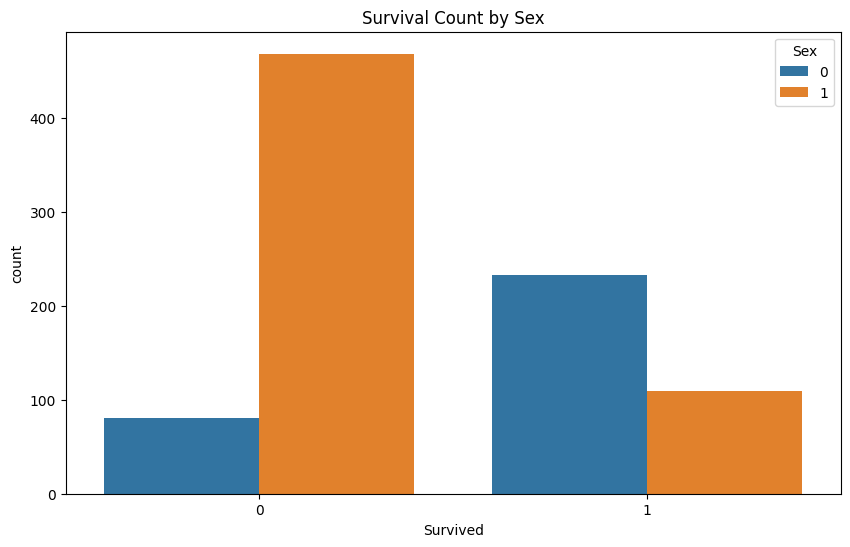

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

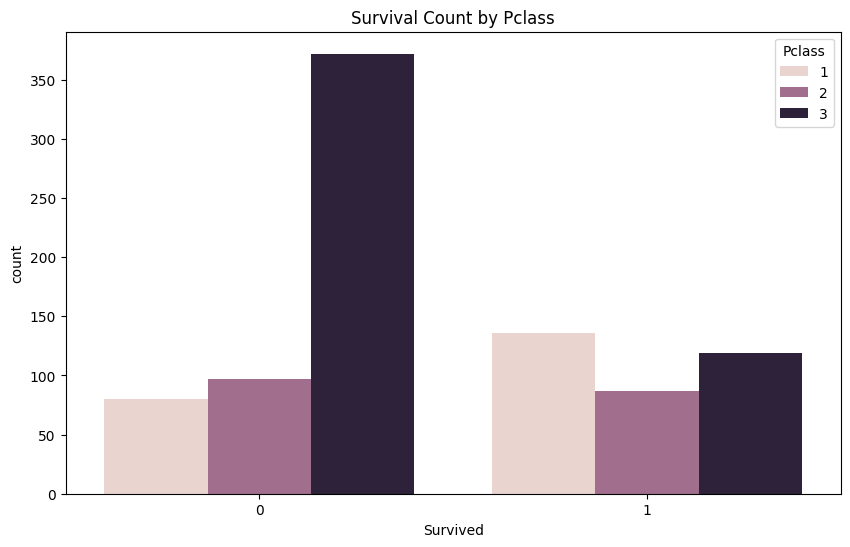

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.show()

In [50]:
x=df[['Pclass','Sex']].values
y=df['Survived'].values

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train

array([[1, 0],
       [3, 1],
       [2, 0],
       ...,
       [2, 0],
       [3, 0],
       [1, 0]], dtype=int64)

In [52]:
classifier=RandomForestClassifier(n_estimators=100)

In [53]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
classifier.score(x_test,y_test)

0.7798507462686567

In [55]:
y_predict=classifier.predict(x_test)

In [56]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       211
           1       0.49      0.96      0.65        57

    accuracy                           0.78       268
   macro avg       0.74      0.85      0.75       268
weighted avg       0.88      0.78      0.80       268



In [58]:
joblib.dump(classifier, 'trained_model.joblib')

['trained_model.joblib']